In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [2]:
data = pd.read_excel("/content/datatab (1).xlsx")
data

,Disease,Age,Gender,Smoker status
0,diseased,43,Male,Smoker
1,not diseased,18,Male,Smoker
2,diseased,22,Female,Non-smoker
3,diseased,25,Male,Non-smoker
4,not diseased,45,Female,Smoker
5,not diseased,12,Male,Non-smoker
6,diseased,23,Male,Smoker
7,diseased,33,Male,Smoker
8,not diseased,27,Male,Non-smoker
9,not diseased,27,Female,Non-smoker


In [3]:
# Encoding the given data into numeric form
data["Disease"] = data["Disease"].map({"diseased": 1, "not diseased":0})
data["Gender"] = data["Gender"].map({"Male":1, "Female":0})
data["Smoker status"] = data["Smoker status"].map({"Smoker":1, "Non-smoker":0})

data

,Disease,Age,Gender,Smoker status
0,1,43,1,1
1,0,18,1,1
2,1,22,0,0
3,1,25,1,0
4,0,45,0,1
5,0,12,1,0
6,1,23,1,1
7,1,33,1,1
8,0,27,1,0
9,0,27,0,0


In [4]:
# Splitting the dataset into features and target variable
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data["Disease"], test_size=0.2)

display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(28, 3)

(28,)

(8, 3)

(8,)

In [5]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [6]:
y_pred = model.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)
acc_score = metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy Percentage:", acc_score, "%")


Confusion Matrix:
 [[1 5]
 [0 2]]
Accuracy Percentage: 37.5 %


<Axes: xlabel='Predicted', ylabel='Actual'>

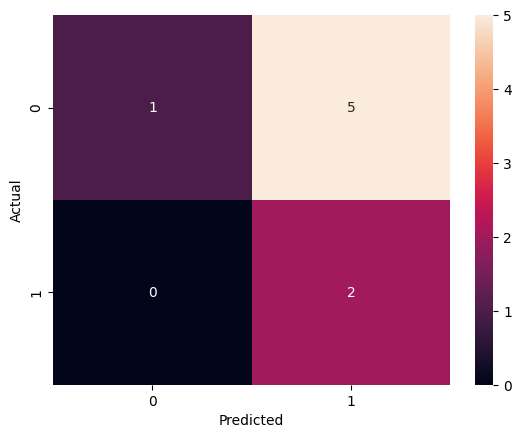

In [7]:
conf_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True)
